# Forest Covertype Classification

## Step 1: Importing libraries


In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')

df.shape

(581012, 55)

In [2]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [3]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


## Step 2: Train Test split

In [4]:
from sklearn.model_selection import train_test_split

# Step 1: Split features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,    # maintain class ratio
    random_state=42
)

# Step 3: Check distribution after split
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Train class distribution:
Cover_Type
2    0.487598
1    0.364606
3    0.061537
7    0.035301
6    0.029892
5    0.016338
4    0.004729
Name: proportion, dtype: float64

Test class distribution:
Cover_Type
2    0.487604
1    0.364603
3    0.061539
7    0.035300
6    0.029887
5    0.016342
4    0.004724
Name: proportion, dtype: float64


## Step 3: Decision Tree Classifier Model

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train a Decision Tree (shallow baseline)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Step 2: Predictions
y_pred_dt = dt.predict(X_test)

# Step 3: Evaluation
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)


Decision Tree Report:
              precision    recall  f1-score   support

           1       0.77      0.75      0.76     42368
           2       0.78      0.84      0.81     56661
           3       0.76      0.81      0.79      7151
           4       0.80      0.66      0.72       549
           5       0.79      0.26      0.39      1899
           6       0.63      0.37      0.47      3473
           7       0.88      0.70      0.78      4102

    accuracy                           0.78    116203
   macro avg       0.77      0.63      0.67    116203
weighted avg       0.78      0.78      0.77    116203

Confusion Matrix:
 [[31618 10354     4     0    18     0   374]
 [ 8177 47721   364     2   109   276    12]
 [    0   814  5826    68     0   443     0]
 [    0     0   166   362     0    21     0]
 [   85  1304    24     0   486     0     0]
 [   21   901  1242    22     3  1284     0]
 [ 1135    82     0     0     0     0  2885]]


## Step 4: Random Forest (Better Ensemble Tree)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,   # let trees grow
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Step 2: Predictions
y_pred_rf = rf.predict(X_test)

# Step 3: Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



## Step 5: XGBoost (Gradient Boosted Trees)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (1–7 → 0–6)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train, y_train_enc)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Decode predictions back to 1–7
y_pred_xgb_decoded = le.inverse_transform(y_pred_xgb)

# Evaluation
from sklearn.metrics import classification_report
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb_decoded))


XGBoost Report:
              precision    recall  f1-score   support

           1       0.89      0.87      0.88     42368
           2       0.89      0.92      0.90     56661
           3       0.91      0.93      0.92      7151
           4       0.90      0.85      0.87       549
           5       0.92      0.68      0.78      1899
           6       0.88      0.84      0.86      3473
           7       0.96      0.93      0.95      4102

    accuracy                           0.90    116203
   macro avg       0.91      0.86      0.88    116203
weighted avg       0.90      0.90      0.89    116203



## Step 6A: Confusion Matrix (for Random Forest)

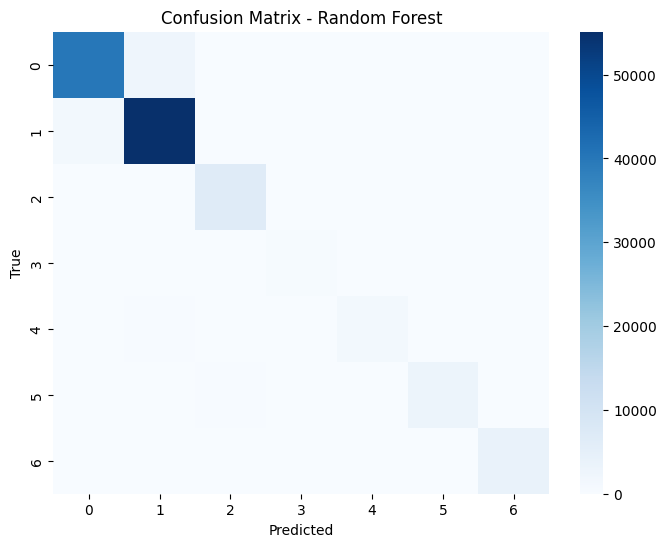

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=False, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Step 6B: Feature Importance (Random Forest)

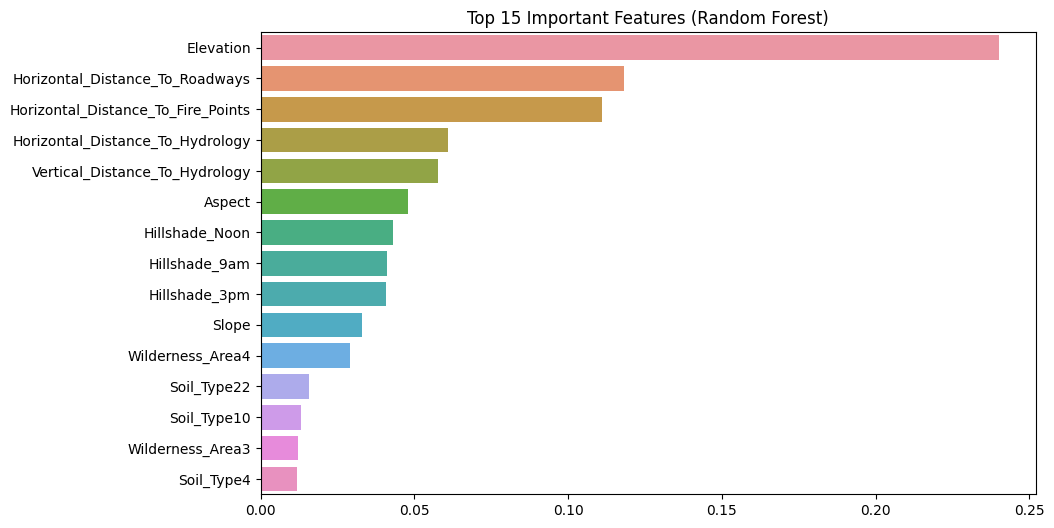

In [9]:
# Get feature importances
importances = rf.feature_importances_
indices = importances.argsort()[::-1][:15]  # Top 15 features

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Top 15 Important Features (Random Forest)")
plt.show()


## Step 6C: Confusion Matrix (for XGBoost)

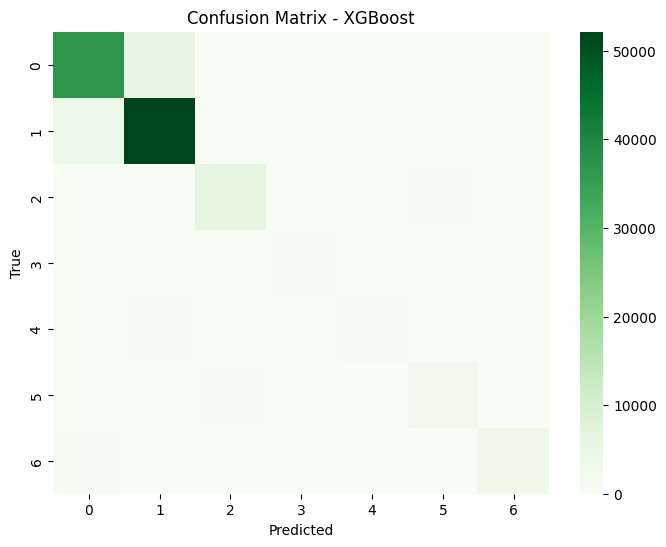

In [10]:
# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb_decoded)

plt.figure(figsize=(8,6))
sns.heatmap(cm_xgb, annot=False, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Step 6D: Feature Importance (XGBoost)

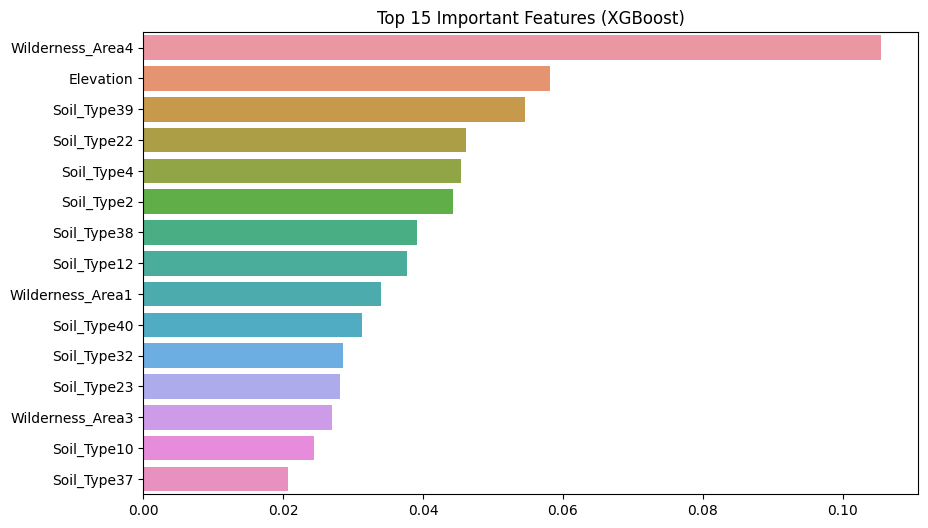

In [11]:
# Get feature importances from XGB
importances_xgb = xgb.feature_importances_
indices_xgb = importances_xgb.argsort()[::-1][:15]

plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb[indices_xgb], y=X.columns[indices_xgb])
plt.title("Top 15 Important Features (XGBoost)")
plt.show()


# Conclusion

- Random Forest > XGBoost on this dataset.

- Reason: Covertype has many binary features (40 soil + 4 wilderness) + large dataset → RF handles variance better.

- XGBoost is still strong, but recall is less in minority classes (esp. class 5).Random Forest performs best on this dataset

---


| Model | Accuracy | Macro F1 | Notes |
| :--- | :--- | :--- | :--- |
| Decision Tree | ~0.78 | ~0.67 | Baseline, weak on minority classes |
| Random Forest | 0.95 | 0.92 | Best overall, very strong on all classes |
| XGBoost | 0.90 | 0.88 | Good, but here RF > XGB |
---